2015 CAASPP test results.


* [Source Website](http://caaspp.cde.ca.gov/sb2015/ResearchFileList)
* [Data Dictionary](http://caaspp.cde.ca.gov/sb2015/research_fixfileformat)



In [123]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import pandas as pd
df = pd.read_csv('../ca2015_all_csv_v1.txt', na_values='*'  )

# Create an identifier that combines the three codes. This ID is typical in other education files, 
# buyt oddly lacking from this one. 
def f(x):
    return "{:02d}{:05d}{:07d}".format(x['County Code'],x['District Code'],x['School Code'])
   
df['cds'] = df.apply(f, axis=1) # This is *really* slow. 

schools = df[df['School Code'] != 0]


In [5]:
ent = pd.read_csv('../ca2015entities_csv.txt')

# Scores By Race and Ethnicity, By School

These initial analyses compare the Mean Scale Scores for each race/ethnicity subgroup, for each school in the state. The scores are for Grade 11, reading test. 


In [142]:
mss = schools[['cds','Subgroup ID','Grade','Test Id','Mean Scale Score']]
mss = mss[(mss['Grade'] == 3) & (mss['Test Id'] == 1)]
mss = mss[['cds','Subgroup ID','Mean Scale Score']]
mssp = pd.pivot_table(mss,index='cds', columns='Subgroup ID', values='Mean Scale Score')

## Summary Statistics For Race/Ethnicity

For each Race/Eth name, the suffix 'ED' means 'Economically Disadvantaged' -- usually assessed by paricipation in the free lunch program -- and 'P' means 'Not Economically Disadvantaged' ( Priviledged )

In [152]:
from pandas.tools.plotting import scatter_matrix

race_eth = mssp[[74,76,77,78,80, 1]+[200,202,203,204,206,31]+[220, 222, 223, 224, 226, 111]]
rec = [
    'Black', 'Asian', 'Filipino' , 'Latino', 'White', 'All',
    'BlackED', 'AsianED', 'FilipinoED' , 'LatinoED', 'WhiteED', 'AllED', 
    'BlackP', 'AsianP', 'FilipinoP' , 'LatinoP', 'WhiteP', 'AllP']

race_eth.columns = rec
#scatter_matrix(race_eth, figsize=(15,15))
re_summary = race_eth.describe().T
ave_std = re_summary['std'].mean()
re_summary['mean_all_diff'] = re_summary['mean'] - re_summary.loc['All']['mean']
re_summary['mean_all_diff_std'] = (re_summary['mean'] - re_summary.loc['All']['mean'])/ ave_std
re_summary.sort('mean')

,count,mean,std,min,25%,50%,75%,max,mean_all_diff,mean_all_diff_std
BlackED,561,2351.799109,28.597845,2288.2,2330.000,2350.70,2371.400,2449.9,-50.840685,-1.507411
Black,755,2360.364768,32.937203,2287.8,2336.550,2359.20,2380.100,2481.0,-42.275026,-1.253442
LatinoED,3979,2373.324629,26.439969,2238.4,2355.200,2371.90,2390.050,2485.8,-29.315165,-0.869186
AllED,4961,2381.328502,30.075956,2238.4,2360.800,2379.50,2401.000,2502.3,-21.311292,-0.631873
Latino,4645,2384.992099,32.681681,2238.4,2361.800,2381.80,2405.600,2515.2,-17.647695,-0.523249
WhiteED,921,2393.132465,31.487200,2308.0,2371.700,2393.10,2413.900,2511.1,-9.507329,-0.281889
BlackP,48,2396.927083,35.827570,2316.2,2376.950,2394.40,2425.150,2484.6,-5.712711,-0.169380
All,5629,2402.639794,43.163018,2238.4,2370.000,2397.40,2432.500,2538.0,0.000000,0.000000
AsianED,319,2417.622257,37.809818,2325.0,2391.400,2418.50,2441.100,2511.7,14.982463,0.444226
LatinoP,1452,2419.542011,34.704710,2307.1,2395.075,2421.00,2444.000,2527.0,16.902217,0.501146


Note that the White mean is exactly at the median of the means, at least for grade == 1 and test == 1

In [139]:
re_summary['mean'].describe()


count      15.000000
mean     2417.965845
std        40.538509
min      2351.799109
25%      2389.062282
50%      2419.542011
75%      2451.420290
max      2488.453038
Name: mean, dtype: float64

Note that the Black mean is about 1 standard deviation ( ``std`` column ) below the White mean, while the Latino mean is about .6 std below and the Asian mean is about .6 std above. These are very common differences, which appear on almost any cognitive test, so it's a good check on the validity of the test. 

Additionally, note that the difference in economic status is also about 1 std. 

In [100]:
def test_plot(df, g1, g2):
    from scipy.stats import ttest_ind
    df_nv = df[[g1, g2]].dropna()
    df_nv[[g1,g2]].plot(kind='kde',figsize=(15,15))
    diff = (df_nv[g1].mean()-df_nv[g2].mean())
    ave_std = (df_nv[g1].std()+df_nv[g2].std())
    print (ttest_ind(df_nv[g1],df_nv[g2], equal_var = False), diff, diff/ave_std)

# Histograms of Mean Scale Score

Histograms showing the spread of scores, first for Disadvantaged Whites vs Asians. This chart shows that the Asians aren't crowding the top of the scale, which would reduce the utility of the scores. 


Note the odd shape, with a long flat tail to the right. 

((-6.2403310357723925, 1.0946123748196584e-09), -22.953521126759824, -0.30385082126452173)


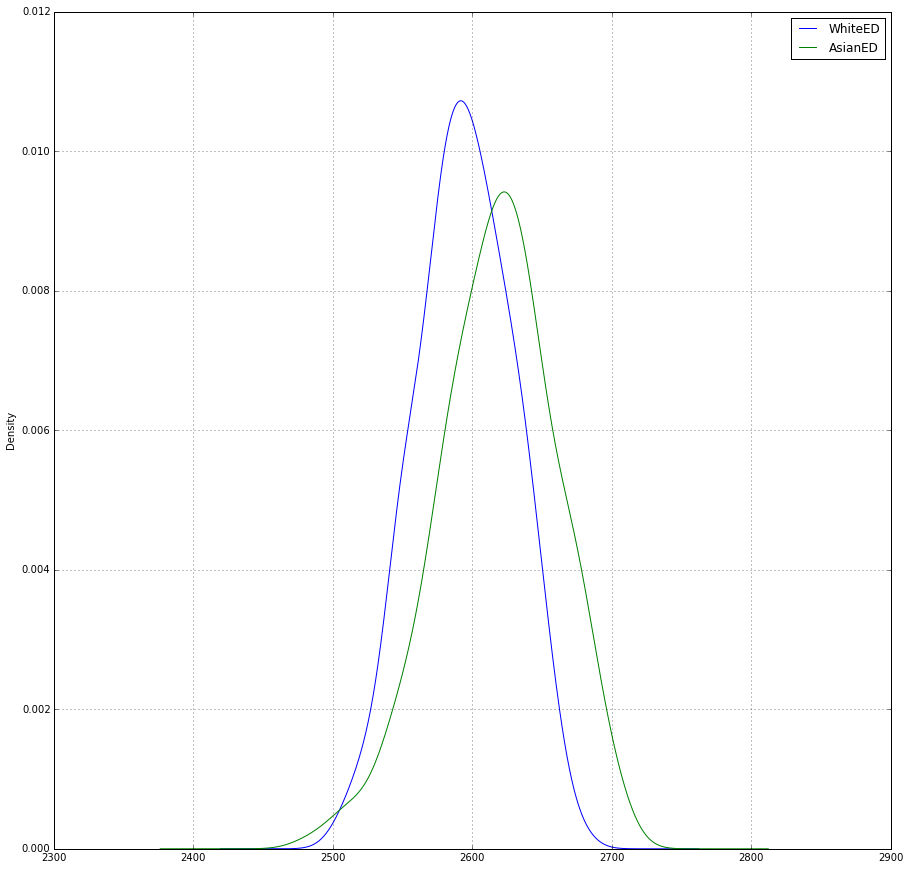

In [101]:
test_plot(race_eth, 'WhiteED','AsianED')

((9.0736227508641694, 4.2686622919986673e-19), 20.715789473684254, 0.25293313886069779)


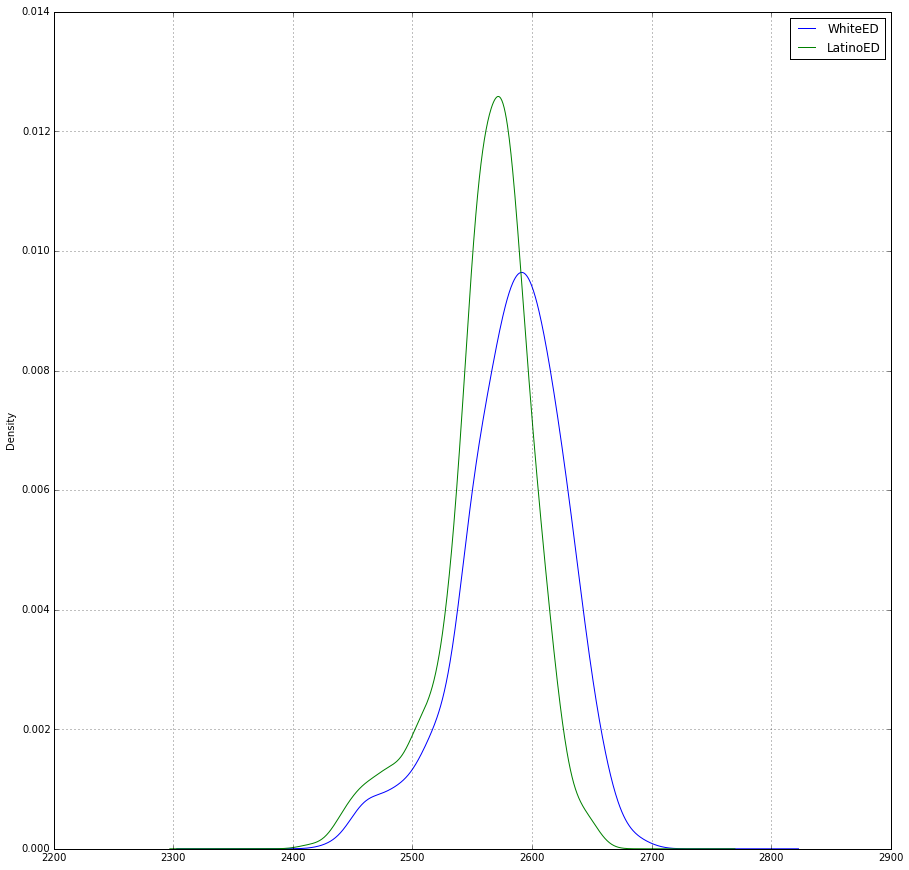

In [102]:

test_plot(race_eth, 'WhiteED','LatinoED')

Whites, Disadvantaged vs Priviledged.

((-14.323836714243649, 3.7977092059577594e-43), -34.492914653783828, -0.40696923137129015)


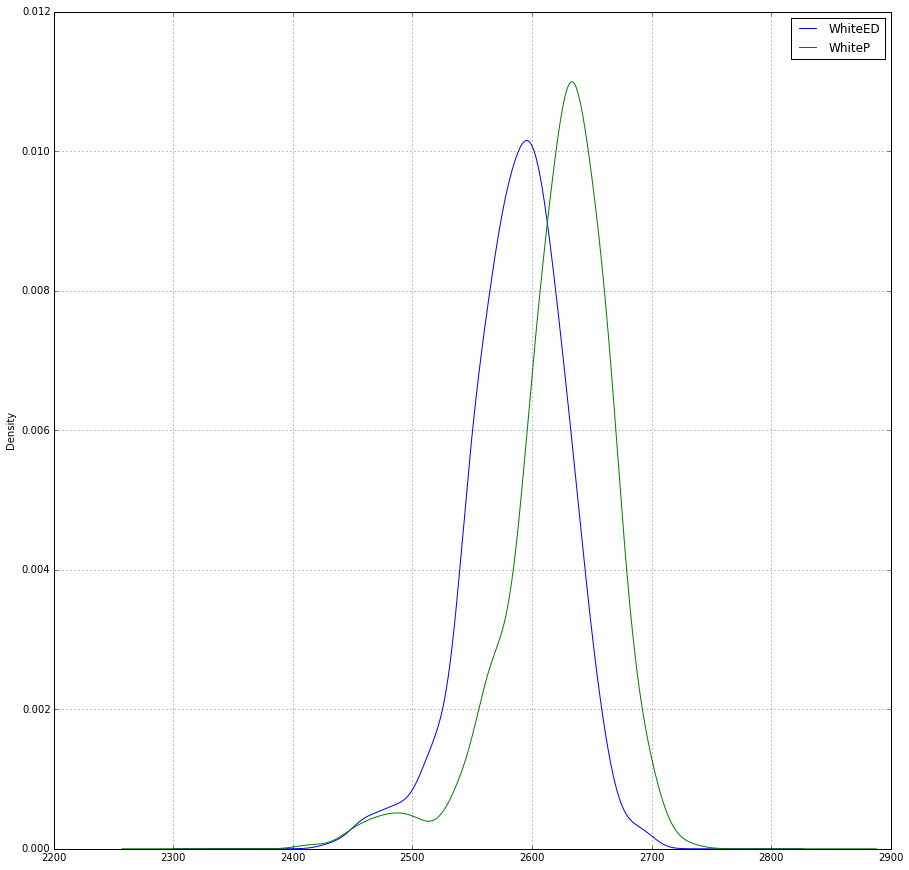

In [103]:
test_plot(race_eth, 'WhiteED','WhiteP')

((-9.1453249813974278, 1.4418249953270294e-19), -20.946382556987373, -0.20424076727802509)


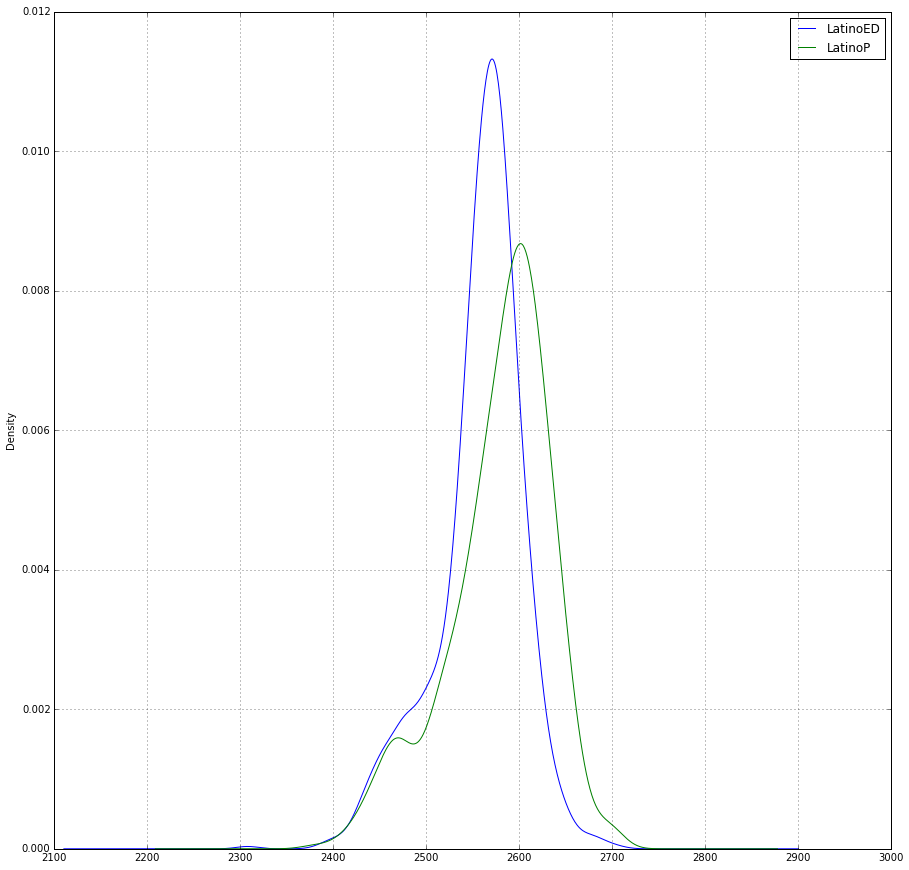

In [104]:
test_plot(race_eth, 'LatinoED','LatinoP')

Here are the two groups that are farthest apart, Disadvantaged Blacks and Priviledged Asians

((-20.814642031938813, 3.3284509061058645e-54), -103.40614035087719, -1.3805816230906283)


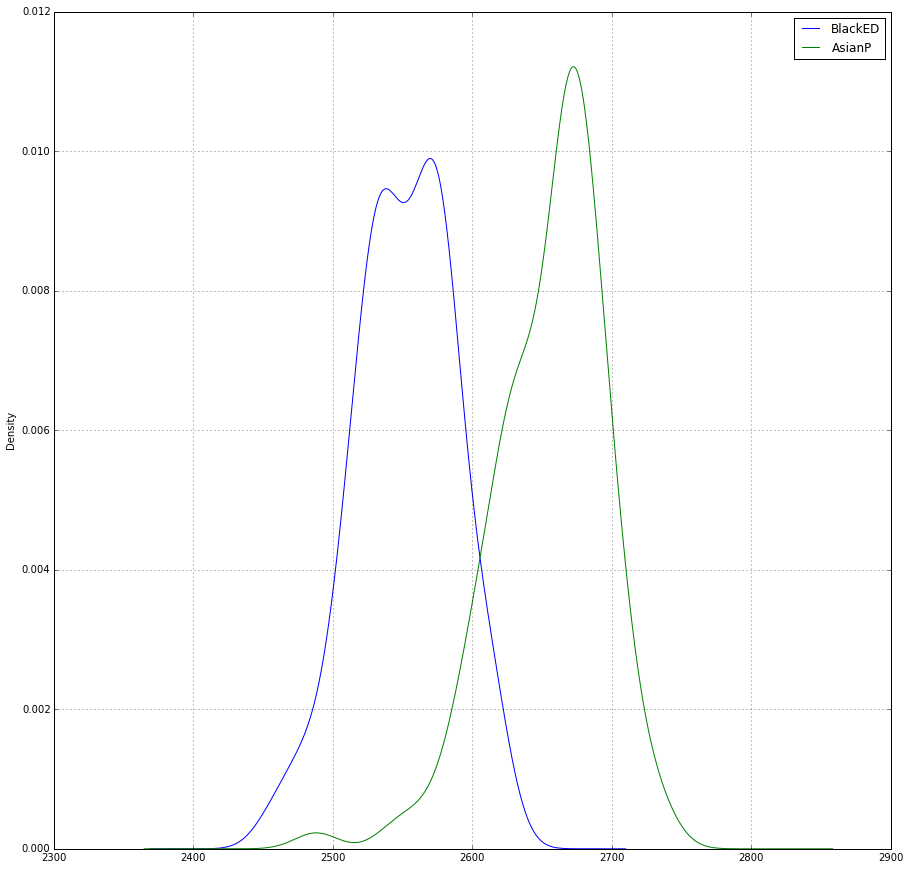

In [105]:
test_plot(race_eth, 'BlackED','AsianP')

((-2.0846229394403619, 0.037891193365519625), -8.3035087719295007, -0.1135311062142377)


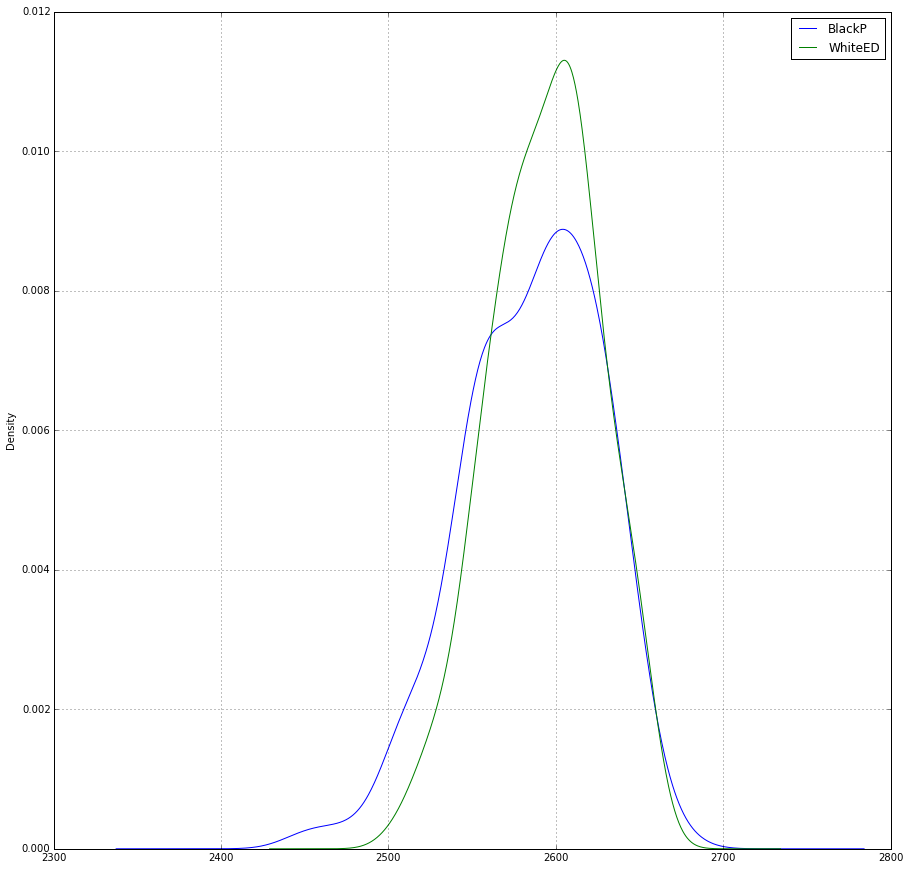

In [107]:
test_plot(race_eth, 'BlackP','WhiteED')

### Differences between  Disadvantaged/Priviledged in Same School

These are histograms of the difference between the P and ED groups in a single school. It's surprising that there are a lot of schools where the scores for the disadvantaged group is higher than the priveledged group. 


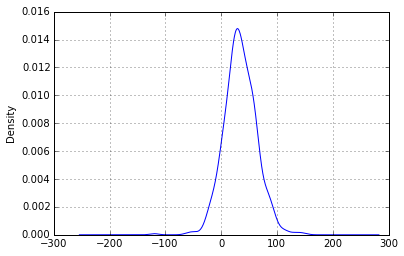

In [14]:
(race_eth['WhiteP'] - race_eth['WhiteED']).plot(kind='kde')

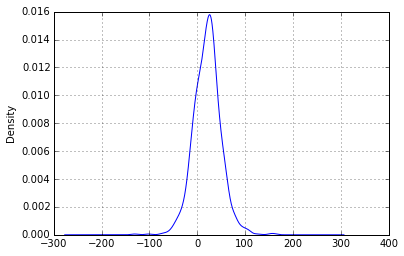

In [15]:
(race_eth['LatinoP'] - race_eth['LatinoED']).plot(kind='kde')

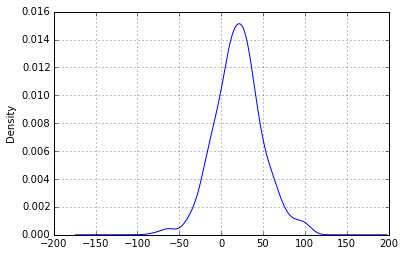

In [16]:
(race_eth['WhiteED'] - race_eth['LatinoED']).plot(kind='kde')

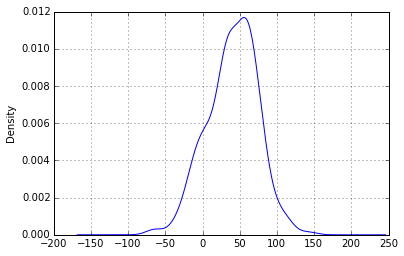

In [17]:
(race_eth['WhiteED'] - race_eth['BlackED']).plot(kind='kde')

# By Parent Education

In [18]:
from pandas.tools.plotting import scatter_matrix

parent = mssp[[90,91,92,93,94]]
parent.columns = ["< High", 'High School', 'Some College','College','Graduate']
p_re_summary = parent.describe().T
p_re_summary

,count,mean,std,min,25%,50%,75%,max
< High,1214,2542.951071,54.295279,2375.8,2511.275,2552.45,2577.90,2706.1
High School,1407,2558.903412,55.370149,2273.0,2529.100,2569.10,2595.85,2756.3
Some College,1379,2583.262364,53.816903,2402.9,2556.650,2592.50,2619.45,2739.5
College,1040,2620.761346,46.819830,2435.8,2595.300,2625.70,2652.50,2759.2
Graduate,787,2642.218424,49.988998,2433.1,2615.450,2649.70,2676.20,2757.0


In [19]:
print p_re_summary.loc['< High']['mean'] - p_re_summary.loc['College']['mean']
print p_re_summary.loc['College']['mean'] - p_re_summary.loc['Graduate']['mean']
print p_re_summary.loc['< High']['mean'] - p_re_summary.loc['Graduate']['mean']


-77.8102753136
-21.4570782426
-99.2673535562


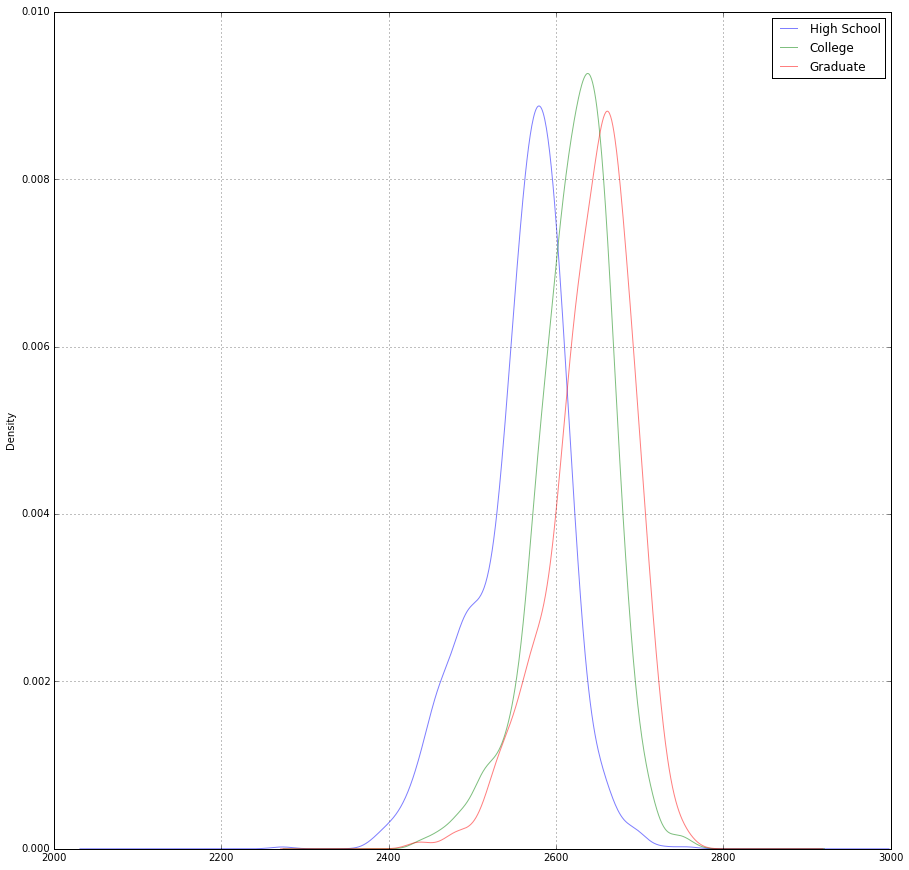

In [20]:
parent[['High School','College','Graduate']].plot(kind='kde', alpha=0.5,  figsize=(15,15))

In [150]:
race_eth.loc[['37680236037964']].T

cds,37680236037964
Black,NaN
Asian,NaN
Filipino,NaN
Latino,2453.0
White,NaN
BlackED,NaN
AsianED,NaN
FilipinoED,NaN
LatinoED,2452.3
WhiteED,NaN


Index([u'01000650100065', u'01069060106906', u'01086700108670', u'01089440108944', u'01098350109835', u'01100170130401', u'01100170130419', u'01118560111856', u'01126070112607', u'01139020113902', u'01144210114421', u'01148680114868', u'01152380115238', u'01182240118224', u'01184890118489', u'01192220119222', u'01209310120931', u'01226970122697', u'01267480126748', u'01279440127944', u'01306090130609', u'01306170130617', u'01306250130625', u'01306660130666', u'01307723030772', u'01316170131763', u'01611190106401', u'01611190130229', u'01611190132878', u'01611190134304', u'01611197035512', u'01611270130294', u'01611270130450', u'01611276131114', u'01611430131177', u'01611430134924', u'01611500132225', u'01611500135533', u'01611507035512', u'01611507077878', u'01611680132746', u'01611760130062', u'01611760130138', u'01611760130435', u'01611760130534', u'01611760134270', u'01611760134452', u'01611760135244', u'01611760138693', u'01611766131189', u'01611767077548', u'01611920133009', u'016